In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")



In [3]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Krushna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the Excel file
file_path = "MITWPU Kothrud AQMS Dataset_Air Pollutants.xlsx"
df = pd.read_excel(file_path)

# Save as CSV
df.to_csv("Cleaned_AQMS_Data.csv", index=False)

print("✅ File converted to CSV successfully!")


✅ File converted to CSV successfully!


In [6]:
print(df.columns)


Index(['Timestamp', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [7]:
# ===========================
# 🔹 Step 1: Load and Clean Data
# ===========================
df = pd.read_csv("Cleaned_AQMS_Data.csv", header=2)  # Adjust header if needed
df.columns = ["Timestamp", "PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "NH3", "Temperature", "Humidity"]

# Convert timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Convert all pollutant columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)
df.fillna(df.median(), inplace=True)  # Use median for any remaining NaN



C:\Users\Krushna\AppData\Local\Temp\ipykernel_20528\1863558969.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\Krushna\AppData\Local\Temp\ipykernel_20528\1863558969.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


In [8]:
# ===========================
# 🔹 Step 2: Feature Engineering (Air Quality Classification)
# ===========================
def classify_air_quality(pm25):
    if pm25 <= 30:
        return "Good"
    elif pm25 <= 60:
        return "Moderate"
    elif pm25 <= 90:
        return "Poor"
    else:
        return "Severe"

df["Air_Quality"] = df["PM2.5"].apply(classify_air_quality)



In [9]:
# ===========================
# 🔹 Step 3: Detect Sensitive Areas (High Pollution)
# ===========================
sensitive_areas = df[df["Air_Quality"].isin(["Poor", "Severe"])]

# Generate Alerts
alerts = []
for index, row in sensitive_areas.iterrows():
    alerts.append(f"⚠️ ALERT: High pollution detected at {row['Timestamp']} - Air Quality: {row['Air_Quality']}")



In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # ✅ FIXED: Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Encode Air_Quality labels
df["Air_Quality_Label"] = df["Air_Quality"].map({"Good": 0, "Moderate": 1, "Poor": 2, "Severe": 3})

# Select features and target
X = df[["PM10", "NO2", "SO2", "CO", "O3", "NH3", "Temperature", "Humidity"]]
y = df["Air_Quality_Label"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred)

# Print results
print(f"✅ Model Training Completed!")
print(f"🔹 Accuracy: {accuracy:.2f}")
print(f"🔹 F1-Score: {f1:.2f}")
print("\nClassification Report:\n", report)


✅ Model Training Completed!
🔹 Accuracy: 0.94
🔹 F1-Score: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1719
           1       0.91      0.94      0.92      1268
           2       0.89      0.87      0.88       914
           3       0.96      0.96      0.96      1478

    accuracy                           0.94      5379
   macro avg       0.93      0.93      0.93      5379
weighted avg       0.94      0.94      0.94      5379



C:\Users\Krushna\AppData\Local\Temp\ipykernel_20528\3663535076.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Air_Quality"], palette="coolwarm")


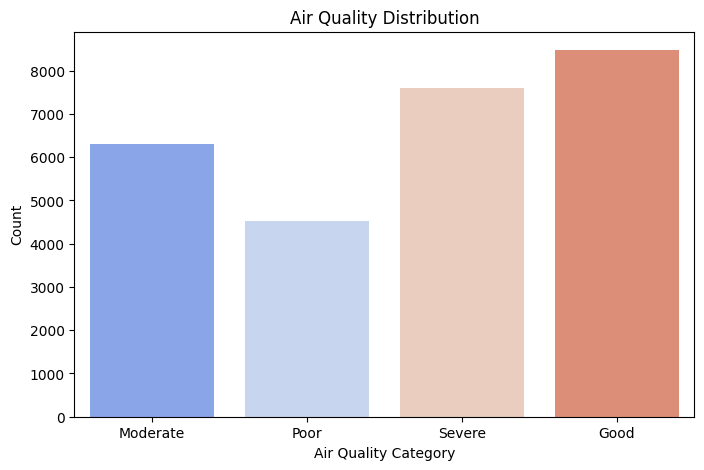

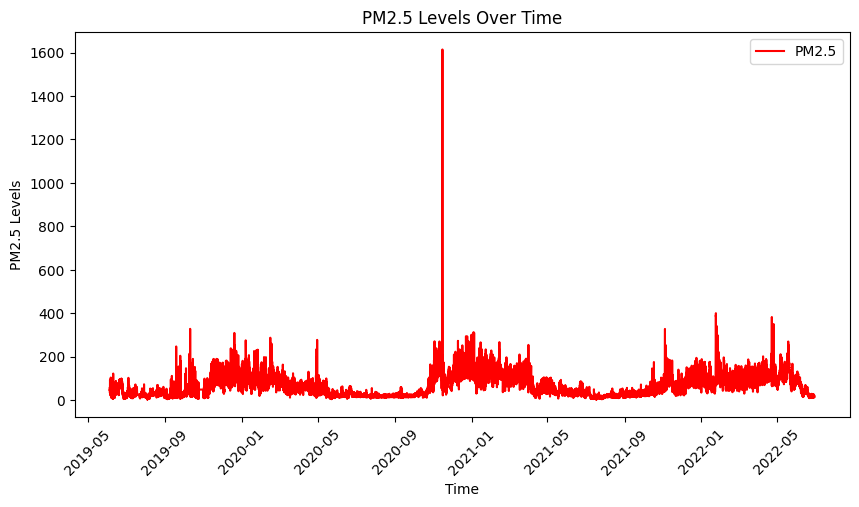

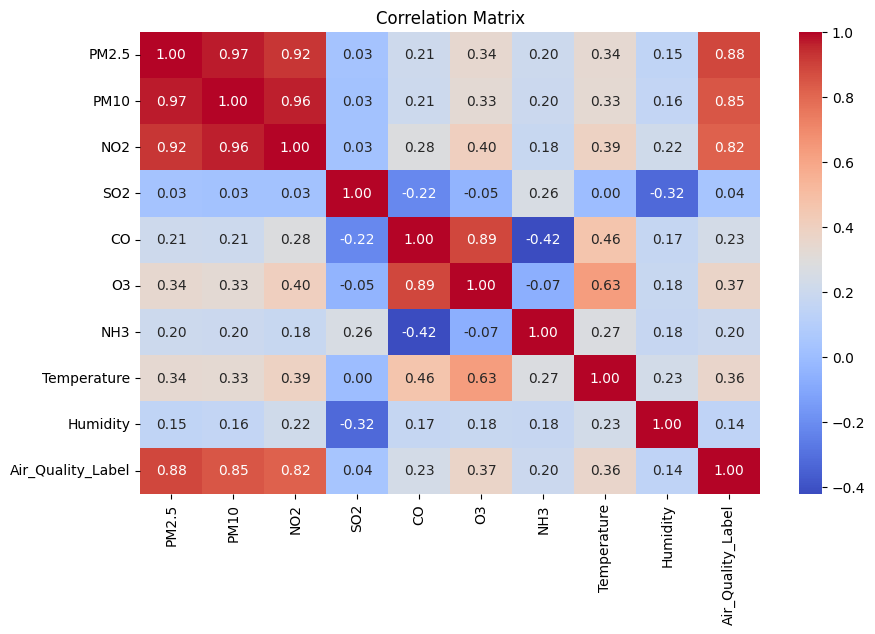

✅ Data Cleaning Completed!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26893 entries, 0 to 26892
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          26893 non-null  datetime64[ns]
 1   PM2.5              26893 non-null  float64       
 2   PM10               26893 non-null  float64       
 3   NO2                26893 non-null  float64       
 4   SO2                26893 non-null  float64       
 5   CO                 26893 non-null  float64       
 6   O3                 26893 non-null  float64       
 7   NH3                26893 non-null  float64       
 8   Temperature        26893 non-null  float64       
 9   Humidity           26893 non-null  float64       
 10  Air_Quality        26893 non-null  object        
 11  Air_Quality_Label  26893 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 2.5+ MB
None
       

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  

# ===========================
# 🔹 Step 5: Visualization
# ===========================

# 1️⃣ Air Quality Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["Air_Quality"], palette="coolwarm")
plt.title("Air Quality Distribution")
plt.xlabel("Air Quality Category")
plt.ylabel("Count")
plt.show()

# 2️⃣ PM2.5 Levels Over Time
plt.figure(figsize=(10,5))
plt.plot(df["Timestamp"], df["PM2.5"], label="PM2.5", color="red")
plt.xlabel("Time")
plt.ylabel("PM2.5 Levels")
plt.title("PM2.5 Levels Over Time")
plt.legend()
plt.xticks(rotation=45)  # ✅ Improve readability
plt.show()

# 3️⃣ Heatmap of Correlation Between Features
plt.figure(figsize=(10,6))

# ✅ Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=[np.number])

if not df_numeric.empty:  
    sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("⚠️ No numeric columns found for correlation heatmap.")

# ===========================
# 🔹 Step 6: Output Insights
# ===========================

print("✅ Data Cleaning Completed!\n")
print(df.info())
print(df.head())

# ✅ Check if alerts exist before printing
if 'alerts' in locals() and alerts:
    print("\n🔹 Sensitive Areas Detected:")
    for alert in alerts[:5]:  # Show first 5 alerts
        print(alert)
else:
    print("\n⚠️ No alerts found in dataset.")

print("\n🔹 Model Performance:")
if 'accuracy' in locals() and 'f1' in locals() and 'report' in locals():
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", report)
else:
    print("⚠️ Model has not been trained yet. Train the model before evaluating performance.")
